In [1]:
import pandas as pd
import seaborn as sns
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as pl

In [2]:
matches=pd.read_csv('WorldCupMatches.csv')
players=pd.read_csv('WorldCupPlayers.csv')
cups=pd.read_csv('WorldCups.csv')

In [3]:
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [4]:
players.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


In [5]:
cups.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [6]:
matches_temp=matches[matches['Year'].notnull()]

In [7]:
matches_temp['Year']=matches_temp['Year'].astype(int)
matches_temp=matches_temp.groupby('Year')['Attendance'].sum().reset_index()

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
matches_temp

,Year,Attendance
0,1930,590549.0
1,1934,363000.0
2,1938,375700.0
3,1950,1045246.0
4,1954,768607.0
5,1958,819810.0
6,1962,893172.0
7,1966,1563135.0
8,1970,1603975.0
9,1974,1865753.0


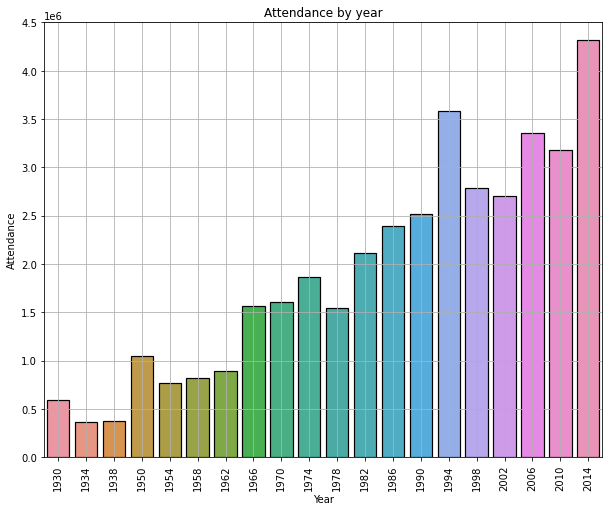

In [9]:
pl.figure(figsize=(10,8))
sns.barplot(matches_temp['Year'],matches_temp['Attendance'],
           linewidth=1.2,edgecolor='k')
pl.xticks(rotation=90)
pl.ylim(0,4500000)
pl.grid()
pl.title('Attendance by year')
pl.show()

2014 had tha maximum attandees followed by 1994

In [10]:
matches_notnull=matches[matches['Year'].notnull()].copy()

In [11]:
matches_temp=matches_notnull.groupby('Year')['Attendance'].mean().reset_index()

In [12]:
matches_temp['Year']=matches_temp['Year'].astype(int)

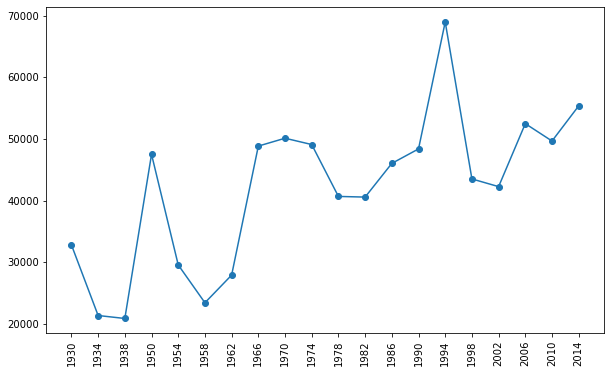

In [13]:
pl.figure(figsize=(10,6))
pl.plot(matches_temp['Attendance'],marker='o')
pl.xticks(range(len(matches_temp)),matches_temp['Year'],rotation=90)
pl.show()

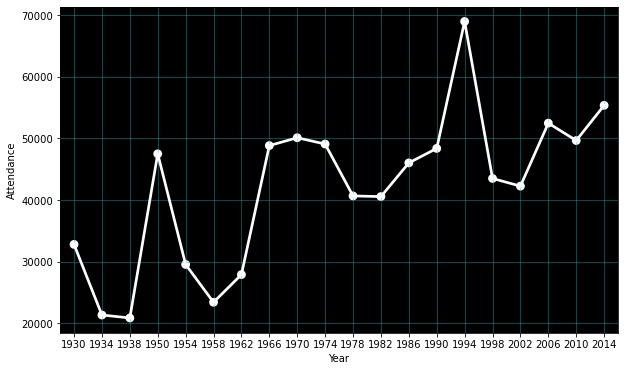

In [14]:
pl.figure(figsize=(10,6))
ax=sns.pointplot(matches_temp['Year'],matches_temp['Attendance'],color='w')
ax.set_facecolor('k')
pl.grid(color='c',alpha=0.5)
pl.show()

In [15]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


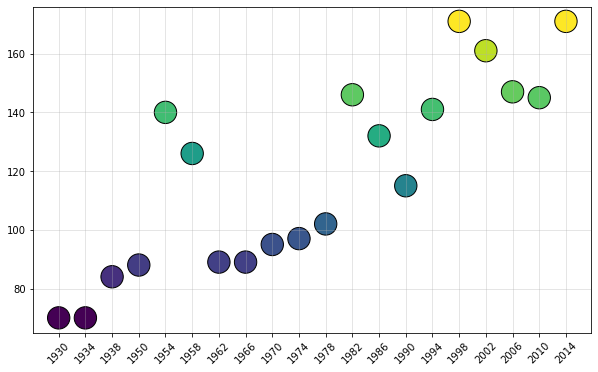

In [16]:
cups_t=cups.copy()
cups_t['Year']=cups_t['Year'].astype(str)
pl.figure(figsize=(10,6))
ax=pl.scatter(data=cups_t,x='Year',y='GoalsScored',c=cups_t['GoalsScored'],s=500,
          edgecolor='k',linewidth=1,)
pl.xticks(cups_t['Year'].unique())
pl.xticks(rotation=45)
pl.grid(alpha=0.4)

In [17]:
cups_t['Year'].unique()

array(['1930', '1934', '1938', '1950', '1954', '1958', '1962', '1966',
       '1970', '1974', '1978', '1982', '1986', '1990', '1994', '1998',
       '2002', '2006', '2010', '2014'], dtype=object)

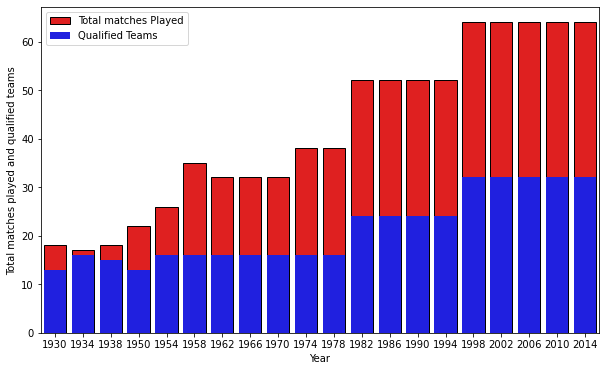

In [18]:
pl.figure(figsize=(10,6))
sns.barplot(data=cups_t,x='Year',y='MatchesPlayed',color='r',edgecolor='k',label='Total matches Played')
sns.barplot(data=cups_t,x='Year',y='QualifiedTeams',color='b',label='Qualified Teams')
pl.legend()
pl.ylabel('Total matches played and qualified teams')
pl.show()

In [19]:
matches.shape

(4572, 20)

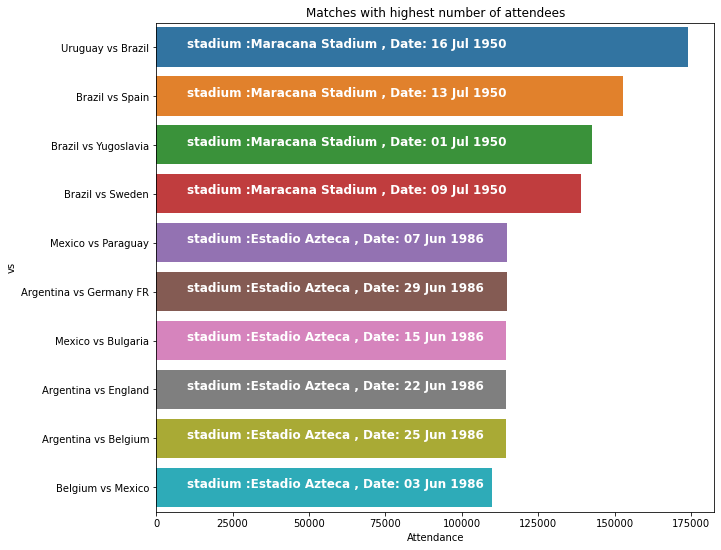

In [20]:
h_att=matches.sort_values('Attendance',ascending=False)[:10]
h_att=h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att['Stadium']=h_att['Stadium'].replace('Maracan� - Est�dio Jornalista M�rio Filho','Maracana Stadium')
h_att['Datetime']=h_att['Datetime'].str.split('-').str[0]
h_att['vs']=h_att['Home Team Name']+' vs '+h_att['Away Team Name']

pl.figure(figsize=(10,9))
ax=sns.barplot(y=h_att['vs'],x=h_att['Attendance'])
pl.title('Matches with highest number of attendees')
for i,j in enumerate('stadium :'+h_att['Stadium']+' , Date: '+h_att['Datetime']):
    ax.text(10000,i,j,fontsize=12,color='w',weight='bold')

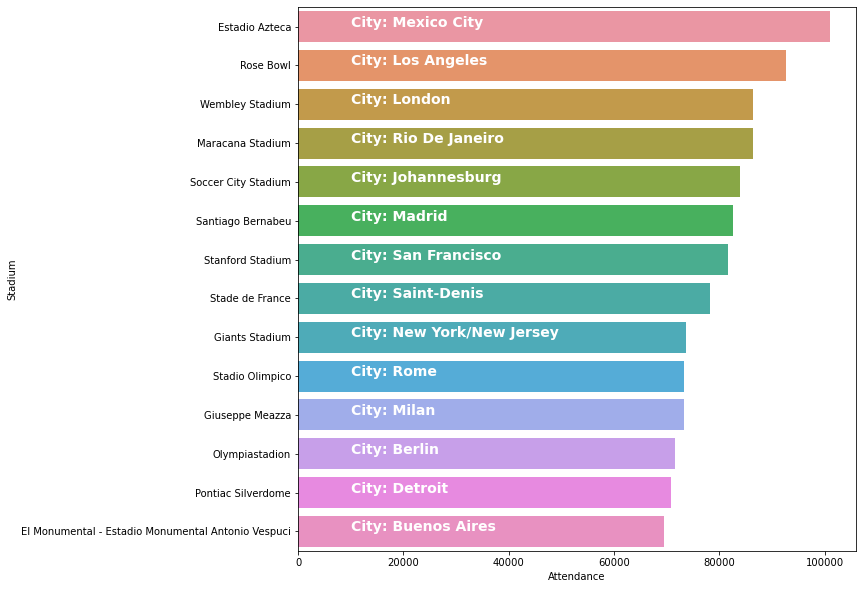

,Stadium,City,Attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracana Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
...,...,...,...
64,Giorgio Ascarelli,Naples,8000.000000
75,Independencia,Belo Horizonte,7590.333333
48,Eucaliptos,Porto Alegre,7329.000000
57,Fort Carree,Antibes,7000.000000


In [21]:
temp=matches.copy()
temp=temp[temp['Year'].notnull()]
temp['Year']=temp['Year'].astype(int)
temp['Stadium']=temp['Stadium'].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',
                                            'Maracana Stadium')
temp['Stadium']=temp['Stadium'].str.replace('Estadio do Maracana','Maracana Stadium')
std=temp.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values('Attendance',ascending=False)
pl.figure(figsize=(10,10))
ax=sns.barplot(y=std['Stadium'][:14],
               x=std['Attendance'][:14])
for i,j in enumerate('City: '+std['City'][:14]):
    ax.text(10000,i,j,fontsize=14,color='w',weight='bold')
pl.show()

std

In [22]:
temp.groupby(['Stadium','City'])['Attendance'].mean()

Stadium           City     
Arena Amazonia    Manaus       40056.750000
Arena Fonte Nova  Salvador     50385.000000
Arena Pantanal    Cuiaba       39679.250000
Arena Pernambuco  Recife       41020.666667
Arena da Baixada  Curitiba     39247.750000
                                   ...     
Wankdorf Stadium  Berne        38900.000000
Wembley Stadium   London       86448.222222
Westfalenstadion  Dortmund     46925.000000
White City        London       45662.000000
Zentralstadion    Leipzig      42000.000000
Name: Attendance, Length: 182, dtype: float64

,City,Counts
0,Mexico City,23
1,Montevideo,18
2,Rio De Janeiro,18
3,Guadalajara,17
4,Johannesburg,15
5,Sao Paulo,14
6,Buenos Aires,12
7,Munich,11
8,Leon,11
9,Belo Horizonte,11


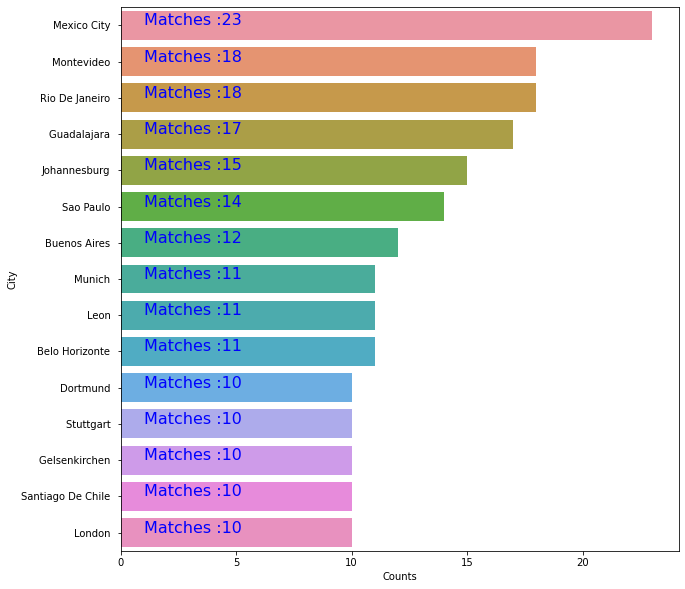

In [23]:
pl.figure(figsize=(10,10))
temp=matches['City'].value_counts().reset_index()[:15]
temp.columns=['City','Counts']
ax=sns.barplot(y=temp['City'],x=temp['Counts'])
for i,j in enumerate('Matches :'+temp['Counts'].astype(str)):
    ax.text(1,i,j,fontsize=16,color='b')
temp

,City,Attendance
79,Mexico City,93806.521739
67,Los Angeles,92600.875000
112,Rio De Janeiro,86417.333333
66,London,82369.600000
119,San Francisco,81737.333333
115,Saint-Denis,78222.222222
91,New York/New Jersey,73689.714286
7,Berlin,71500.000000
30,Detroit,70899.500000
55,Johannesburg,69580.133333


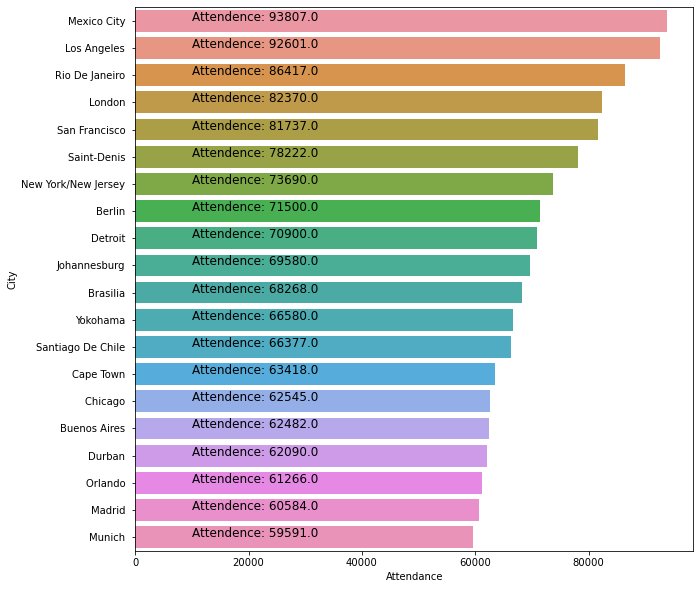

In [54]:
pl.figure(figsize=(10,10))
temp=matches.groupby('City')['Attendance'].mean().reset_index().sort_values('Attendance',ascending=False)[:20]
ax=sns.barplot(temp['Attendance'],temp['City'])

for i,j in enumerate('Attendence: '+ round(temp['Attendance']).astype(str)):
    ax.text(10000,i,j,fontsize=12,color='black')
temp

In [71]:
cups['Winner']=cups['Winner'].replace('Germany FR','Germany')
cups['Runners-Up']=cups['Runners-Up'].replace('Germany FR','Germany')

In [83]:
temp=cups.groupby('Winner')['Year'].count().sort_values(ascending=False).reset_index()
temp1=cups.groupby('Winner')['Year'].apply(" , ".join).reset_index()


temp

TypeError: sequence item 0: expected str instance, int found

In [95]:
from 
cups_val=def
for i,j in zip(cups['Year'],cups['Winner']):
    cups_val[j]=list()
    cups_val[j].append(i)
    
cups_val

{'Uruguay': [1950],
 'Italy': [2006],
 'Germany': [2014],
 'Brazil': [2002],
 'England': [1966],
 'Argentina': [1986],
 'France': [1998],
 'Spain': [2010]}

In [92]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Uruguay,Italy,Germany,Brazil,England,Argentina,France,Spain
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1950,2006,2014,2002,1966,1986,1998,2010
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,1950,2006,2014,2002,1966,1986,1998,2010
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,1950,2006,2014,2002,1966,1986,1998,2010
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,1950,2006,2014,2002,1966,1986,1998,2010
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607,1950,2006,2014,2002,1966,1986,1998,2010
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,1950,2006,2014,2002,1966,1986,1998,2010
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,1950,2006,2014,2002,1966,1986,1998,2010
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135,1950,2006,2014,2002,1966,1986,1998,2010
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975,1950,2006,2014,2002,1966,1986,1998,2010
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753,1950,2006,2014,2002,1966,1986,1998,2010
